In [28]:
import os
from PIL import Image

data_dir = '../../data/'
preprocessed_dir = '../../data_preprocessed/'
result_dir = '../../results/'

print(os.getcwd())

C:\Users\kwyma\OneDrive - UW\MasterWork\_UW - Grad\Deep Learning\Landscape-Generation-GAN\src


In [29]:
image_size = 800
crop_size = 512

if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

img_list = os.listdir(data_dir)

# crop to 512x512 and resize back to 800x800 with linear interpolation
for i in range(len(img_list)):
    img = Image.open(data_dir + img_list[i])
    c_x = (img.size[0] - crop_size) // 2
    c_y = (img.size[1] - crop_size) // 2
    img = img.crop([c_x, c_y, c_x + crop_size, c_y + crop_size])
    img = img.resize((image_size, image_size), Image.Resampling.BILINEAR)
    img.save(preprocessed_dir + img_list[i], 'JPEG')

    if i % 500 == 0:
        print('Resizing %d images...' % i)

Resizing 0 images...
Resizing 500 images...
Resizing 1000 images...
Resizing 1500 images...
Resizing 2000 images...
Resizing 2500 images...
Resizing 3000 images...
Resizing 3500 images...
Resizing 4000 images...


In [31]:
import torch
import torchvision.utils as vutils
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import os
import natsort
from PIL import Image
from torch.utils.data import DataLoader, Dataset

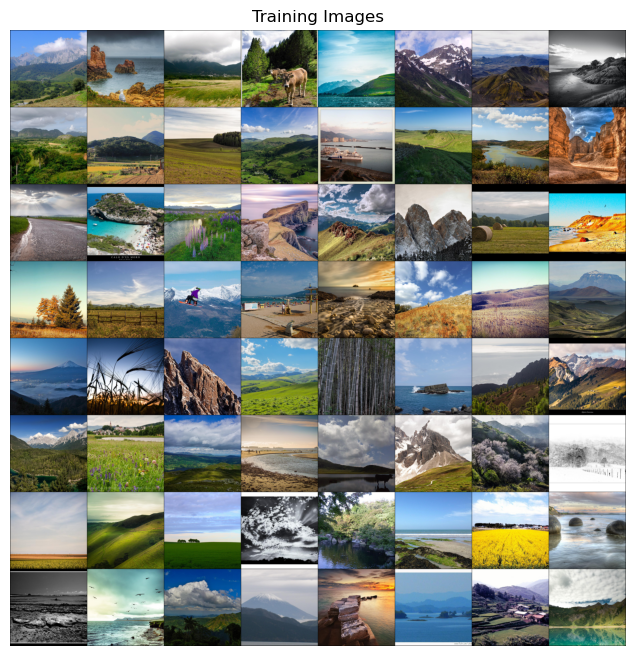

In [32]:
class LandscapeDataset(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        all_images = os.listdir(main_dir)
        self.total_images = natsort.natsorted(all_images)

    def __len__(self):
        return len(self.total_images)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_images[idx])
        image = Image.open(img_loc).convert("RGB")
        tensor_image = self.transform(image)
        return tensor_image
    
image_size = 512
batch_size = 128

transform = transforms.Compose([transforms.Resize(image_size),
                                transforms.CenterCrop(image_size),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])
landscape_data = LandscapeDataset(data_dir, transform=transform)
data_loader = DataLoader(dataset=landscape_data, batch_size=batch_size, shuffle=True)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Plot some training images
real_batch = next(iter(data_loader))
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch.to(device)[:64], padding=2, normalize=True).cpu(), (1, 2, 0)))
plt.show()
